<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band2_rad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

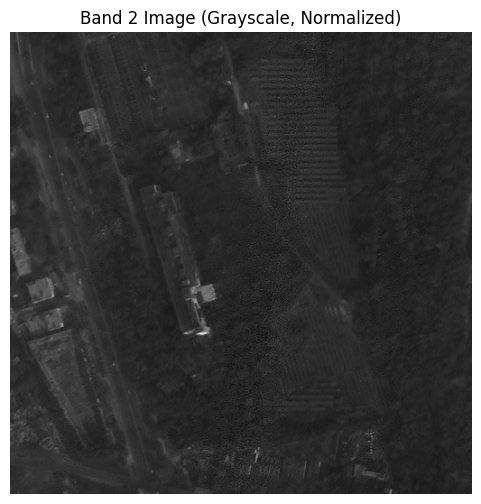

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# File path to the uploaded .rad file
rad_file_path = "/content/band2_image1.rad"

# Assuming the image is 512 x 512 and 16-bit format
image_height = 512
image_width = 512

# Read as 16-bit unsigned integers
with open(rad_file_path, 'rb') as f:
    image_data = np.fromfile(f, dtype=np.uint16)

# Reshape
image = image_data.reshape((image_height, image_width))

# Normalize for display
image_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(image_normalized, cmap='gray')
plt.title("Band 2 Image (Grayscale, Normalized)")
plt.axis("off")
plt.show()


In [2]:
pip install opencv-python scikit-image matplotlib


PSNR:
Gaussian Filter: 40.53 dB
Median Filter:   38.63 dB
Non-Local Means: 53.51 dB
Wavelet Denoise: 56.22 dB


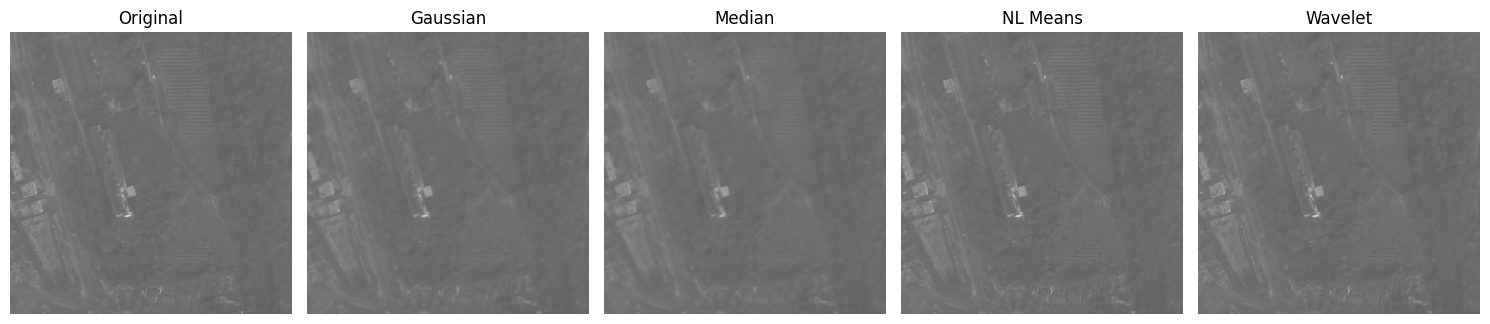

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load image (grayscale)
# Assuming the image is 512 x 512 and 16-bit format
image_height = 512
image_width = 512

# File path to the uploaded .rad file
rad_file_path = "/content/band2_image1.rad"

# Read as 16-bit unsigned integers
with open(rad_file_path, 'rb') as f:
    image_data = np.fromfile(f, dtype=np.uint16)

# Reshape
image_np = image_data.reshape((image_height, image_width))

# Normalize for skimage functions
# Convert to float and normalize to [0, 1] for skimage functions
image_normalized = image_np.astype(np.float32) / np.max(image_np)

# --- 1. Gaussian Blur ---
# Convert back to uint8 for OpenCV functions if needed, or adjust kernel size for uint16
# Using uint16 for GaussianBlur, may need to adjust kernel size
gaussian = cv2.GaussianBlur(image_np, (5, 5), 0)

# --- 2. Median Blur ---
# Using uint16 for medianBlur
median = cv2.medianBlur(image_np, 5)

# --- 3. Non-Local Means Denoising ---
sigma_est = np.mean(estimate_sigma(image_normalized, channel_axis=None))
nlm = denoise_nl_means(image_normalized, h=1.15 * sigma_est, fast_mode=True,
                       patch_size=5, patch_distance=6, channel_axis=None)
# Scale back to original intensity range (0-65535 for uint16) and convert to uint16
nlm = (nlm * np.max(image_np)).astype(np.uint16)


# --- 4. Wavelet Denoising ---
wavelet = denoise_wavelet(image_normalized, convert2ycbcr=False, mode='soft')
# Scale back to original intensity range (0-65535 for uint16) and convert to uint16
wavelet = (wavelet * np.max(image_np)).astype(np.uint16)


# --- PSNR Calculation ---
def calculate_psnr(original, denoised):
    # PSNR calculation is typically for 8-bit images. For 16-bit, we need to
    # adjust the max_val parameter.
    # max_val for uint16 is 2^16 - 1 = 65535
    return psnr(original, denoised, data_range=np.max(original))

print("PSNR:")
print(f"Gaussian Filter: {calculate_psnr(image_np, gaussian):.2f} dB")
print(f"Median Filter:   {calculate_psnr(image_np, median):.2f} dB")
print(f"Non-Local Means: {calculate_psnr(image_np, nlm):.2f} dB")
print(f"Wavelet Denoise: {calculate_psnr(image_np, wavelet):.2f} dB")

# --- Visualization ---
titles = ['Original', 'Gaussian', 'Median', 'NL Means', 'Wavelet']
images = [image_np, gaussian, median, nlm, wavelet]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Displaying 16-bit images with matplotlib's imshow
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=np.max(image_np))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

PSNR:
Gaussian Filter: 40.53 dB
Median Filter:   38.63 dB
Non-Local Means: 53.51 dB
Wavelet Denoise: 56.22 dB


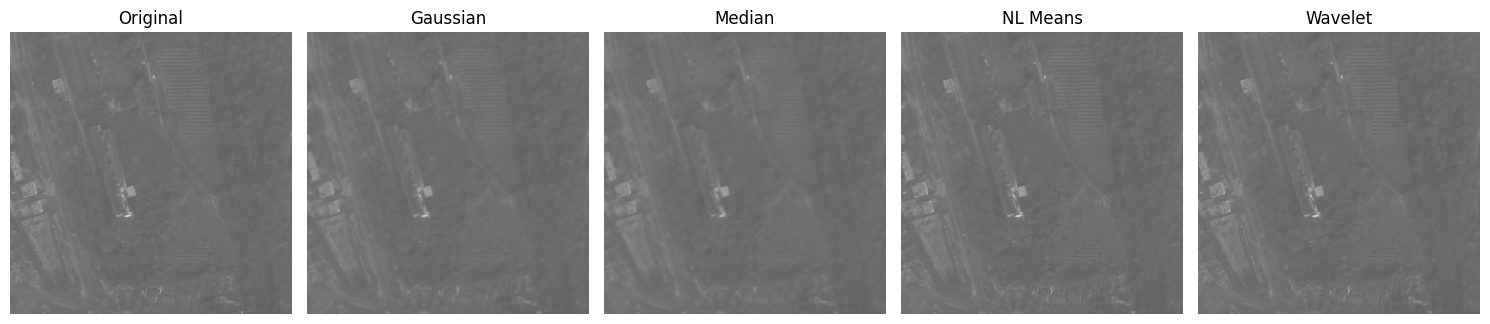

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma, denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio as psnr

# Assuming the image is 512 x 512 and 16-bit format
image_height = 512
image_width = 512

# File path to the uploaded .rad file
rad_file_path = "/content/band2_image1.rad"

# Read as 16-bit unsigned integers
with open(rad_file_path, 'rb') as f:
    image_data = np.fromfile(f, dtype=np.uint16)

# Reshape
image_np = image_data.reshape((image_height, image_width))

# Normalize for skimage functions
# Convert to float and normalize to [0, 1] for skimage functions
image_normalized = image_np.astype(np.float32) / np.max(image_np)

# 4. Apply Denoising Techniques

# --- Gaussian Blur ---
# Using uint16 for GaussianBlur, may need to adjust kernel size
gaussian = cv2.GaussianBlur(image_np, (5, 5), 0)

# --- Median Blur ---
# Using uint16 for medianBlur
median = cv2.medianBlur(image_np, 5)

# --- Non-Local Means ---
sigma_est = np.mean(estimate_sigma(image_normalized, channel_axis=None))
nlm = denoise_nl_means(image_normalized, h=1.15 * sigma_est, fast_mode=True,
                       patch_size=5, patch_distance=6, channel_axis=None)
# Scale back to original intensity range (0-65535 for uint16) and convert to uint16
nlm = (nlm * np.max(image_np)).astype(np.uint16)

# --- Wavelet Denoising ---
wavelet = denoise_wavelet(image_normalized, convert2ycbcr=False, mode='soft')
# Scale back to original intensity range (0-65535 for uint16) and convert to uint16
wavelet = (wavelet * np.max(image_np)).astype(np.uint16)

# 5. PSNR
def calculate_psnr(original, denoised):
    # PSNR calculation is typically for 8-bit images. For 16-bit, we need to
    # adjust the max_val parameter.
    # max_val for uint16 is 2^16 - 1 = 65535
    return psnr(original, denoised, data_range=np.max(original))

print("PSNR:")
print(f"Gaussian Filter: {calculate_psnr(image_np, gaussian):.2f} dB")
print(f"Median Filter:   {calculate_psnr(image_np, median):.2f} dB")
print(f"Non-Local Means: {calculate_psnr(image_np, nlm):.2f} dB")
print(f"Wavelet Denoise: {calculate_psnr(image_np, wavelet):.2f} dB")

# 6. Plotting
titles = ['Original', 'Gaussian', 'Median', 'NL Means', 'Wavelet']
images = [image_np, gaussian, median, nlm, wavelet]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Displaying 16-bit images with matplotlib's imshow
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=np.max(image_np))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()